In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

In [4]:
df = pd.read_excel('C:/Users/Madhawa Hulangamuwa/Desktop/Data Preocessing/FD Index/FD_index_final.xlsx', index_col=0)

In [5]:
x1 = df["HighIncome"].values
x2 = df["LowIncome"].values
x3 = df["LowerMiddleIncome"].values
x4 = df["UpperMiddleIncome"].values

print('Shape of Data \t',df.shape)
print('Original dataset: \n',df.head())

print('After extracting vales High Income:\n',x1)
print('After extracting vales Low Income:\n',x2)
print('After extracting vales Lower Middle Income:\n',x3)
print('After extracting vales Higher Middle Income:\n',x4)

Shape of Data 	 (33, 4)
Original dataset: 
       HighIncome  LowIncome  LowerMiddleIncome  UpperMiddleIncome
year                                                             
1987    0.442170   0.103273           0.188252           0.250367
1988    0.437630   0.100825           0.176691           0.267149
1989    0.448215   0.104761           0.172930           0.272981
1990    0.436333   0.109126           0.178302           0.272374
1991    0.430653   0.106722           0.145982           0.235422
After extracting vales High Income:
 [0.44217039 0.43763002 0.44821528 0.43633271 0.43065275 0.43616455
 0.47621296 0.49623307 0.49811658 0.51272114 0.55605729 0.58059354
 0.59119701 0.60510086 0.60810459 0.57894112 0.59964593 0.60785469
 0.60949214 0.60839623 0.60110687 0.58360985 0.58892246 0.58820532
 0.57352713 0.54520605 0.5457118  0.53296789 0.55024748 0.55005112
 0.55071494 0.54823129 0.53773199]
After extracting vales Low Income:
 [0.10327312 0.10082494 0.10476075 0.10912558 0.1067

      HighIncome  LowIncome  LowerMiddleIncome  UpperMiddleIncome
year                                                             
1987    0.442170   0.103273           0.188252           0.250367
1988    0.437630   0.100825           0.176691           0.267149
1989    0.448215   0.104761           0.172930           0.272981
1990    0.436333   0.109126           0.178302           0.272374
1991    0.430653   0.106722           0.145982           0.235422


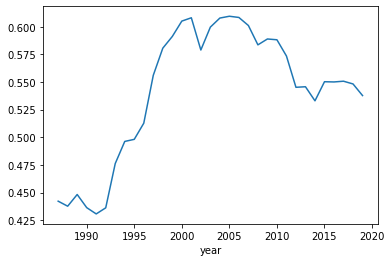

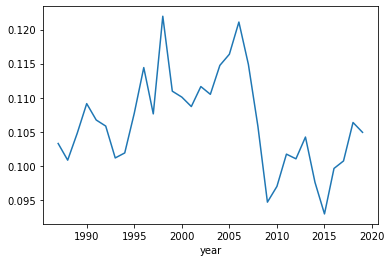

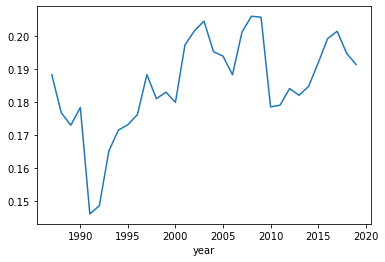

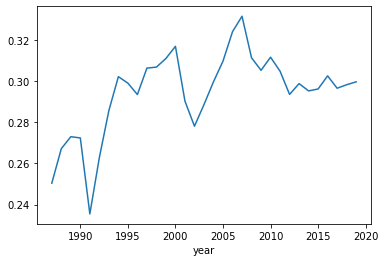

In [6]:
print(df.head())
HighIncome = df['HighIncome']
LowIncome = df['LowIncome']
LowerMiddleIncome = df['LowerMiddleIncome']
UpperMiddleIncome = df['UpperMiddleIncome']

HighIncome.plot()
pyplot.show()

LowIncome.plot()
pyplot.show()

LowerMiddleIncome.plot()
pyplot.show()

UpperMiddleIncome.plot()
pyplot.show()

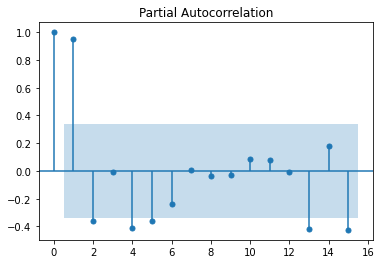

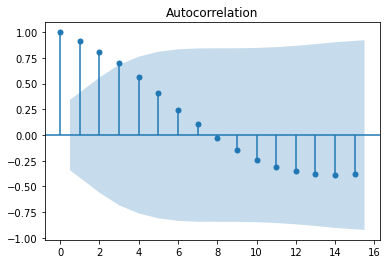

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df['HighIncome'],lags = 15)
acf = plot_acf(df['HighIncome'],lags = 15)


In [8]:
df_train = x1[:len(x1)-7]
df_test = x1[len(x1)-7:]

In [9]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_train, lags=2).fit()
print(model.summary())

E:\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   26
Model:                     AutoReg(2)   Log Likelihood                  65.757
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Sat, 14 May 2022   AIC                             -7.984
Time:                        16:57:24   BIC                             -7.788
Sample:                             2   HQIC                            -7.932
                                   26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0509      0.027      1.916      0.055      -0.001       0.103
y.L1           1.2702      0.201      6.333      0.000       0.877       1.663
y.L2          -0.3592      0.193     -1.864      0.0

In [10]:
pred = model.predict(start = len(df_train),end=len(x1)-1,dynamic = False)

[0.53743262 0.53773034 0.54090041 0.54482021 0.54866069 0.55213117
 0.55516014]


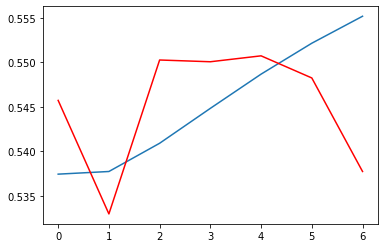

In [11]:
import matplotlib.pyplot as pyplot
pyplot.plot(pred)
pyplot.plot(df_test,color='red')
print(pred)

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(df_test,pred))

In [13]:
print(rmse)

0.008694212820936251


In [14]:
pred_future = model.predict(start=len(x1)+1,end = len(x1)+7,dynamic =False)
print("The future predictions for the next week")
print(pred_future)
print('Number of predictions made: \t',len(pred_future))

The future predictions for the next week
[0.5599772  0.56185789 0.56345089 0.56479891 0.56593906 0.56690316
 0.5677183 ]
Number of predictions made: 	 7


NameError: name 'pred' is not defined